# HUHU@IberLEF2023 Task 1 (Binary Classification - Graphs)

## Libraries

In [1]:
import os
import json
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

## Environment

In [2]:
EXP_NAME = "exp0"
PATH = os.getcwd() + "\\experiments\\" + EXP_NAME

In [3]:
PATHS_TRANSFORMERS_LIST = []
for i in os.walk(PATH):
    PATHS_TRANSFORMERS_LIST.append(i[0])
PATHS_TRANSFORMERS_LIST = PATHS_TRANSFORMERS_LIST[2:]

In [4]:
PATH_BEST_ENSEMBLE = PATH + "\\best-ensemble.json"

In [5]:
PATH_TEST_PREDICTIONS = PATH + "\\test-predictions.csv"

In [6]:
PATHS_EVALUATUONS_LIST = []
for i in PATHS_TRANSFORMERS_LIST:
    PATHS_EVALUATUONS_LIST.append((i + "\\model-evaluation.json"))

In [7]:
with open(PATH_BEST_ENSEMBLE) as file:
    best_ensemble = json.load(file)

In [8]:
test_predictions = pd.read_csv(PATH_TEST_PREDICTIONS)

In [9]:
transformers = []
for i in PATHS_EVALUATUONS_LIST:
    name = re.search(r"(?<=\\)[^\\]+(?=\\model-evaluation.json)", i).group(0)
    with open(i, encoding = "utf8") as file:
        globals()[name] = json.load(file)
    transformers.append(name)

## Graphs

In [10]:
LABELS = ["NOT-Humor", "YES-Humor"]

### Classification Report

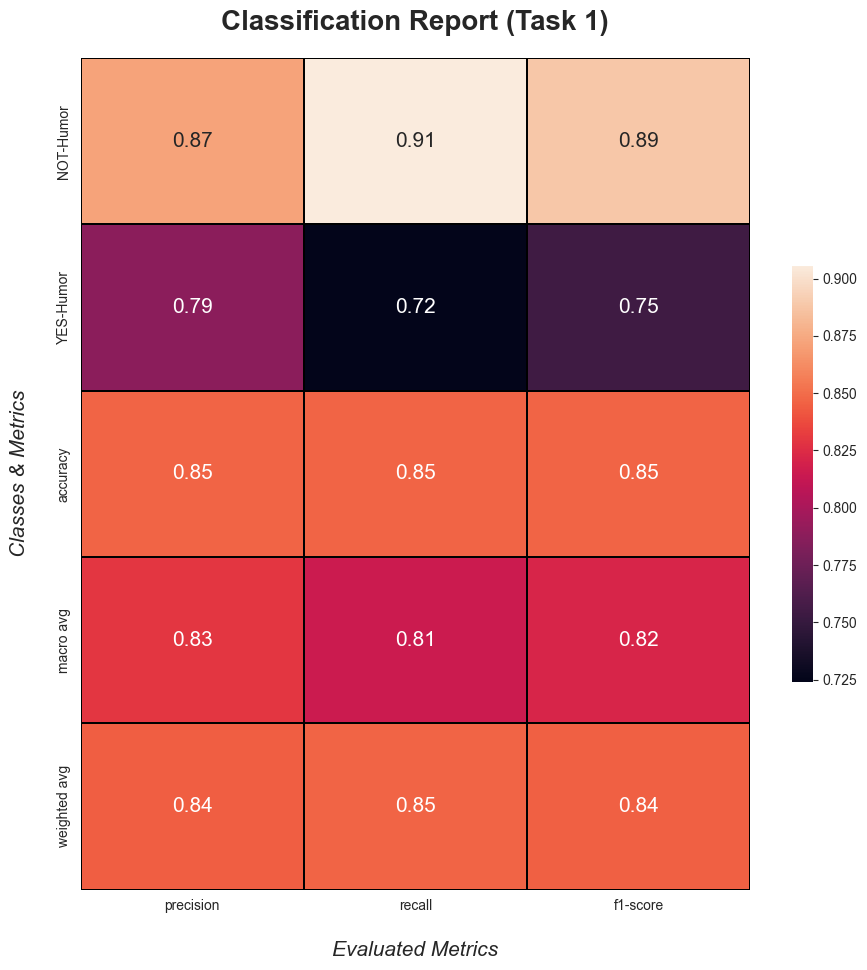

In [11]:
cr = classification_report(y_true = test_predictions["label"], y_pred = test_predictions["predicted_label"], target_names = LABELS, output_dict = True, zero_division = 0)
fig_cr = plt.figure(figsize = (10.8, 10.8))


sb.heatmap(pd.DataFrame(cr).iloc[:-1, :].T, annot = True, fmt = ".2f", cbar_kws = {"shrink": 0.5}, annot_kws = {"size": 15}, linecolor = "black", linewidth = 0.1)
plt.xlabel("Evaluated Metrics", fontsize = 15, labelpad = 20, style = "italic")
plt.ylabel("Classes & Metrics", fontsize = 15, labelpad = 20, style = "italic")
plt.title("Classification Report (Task 1)", fontsize = 20, pad = 20, weight = "bold")


fig_cr.savefig(os.path.join(PATH + "\\!graphs", "CLASSIFICATION-REPORT-T1.png"))
fig_cr.savefig(os.path.join(PATH + "\\!graphs", "CLASSIFICATION-REPORT-T1.pdf"))
plt.show()

### Confusion Matrix

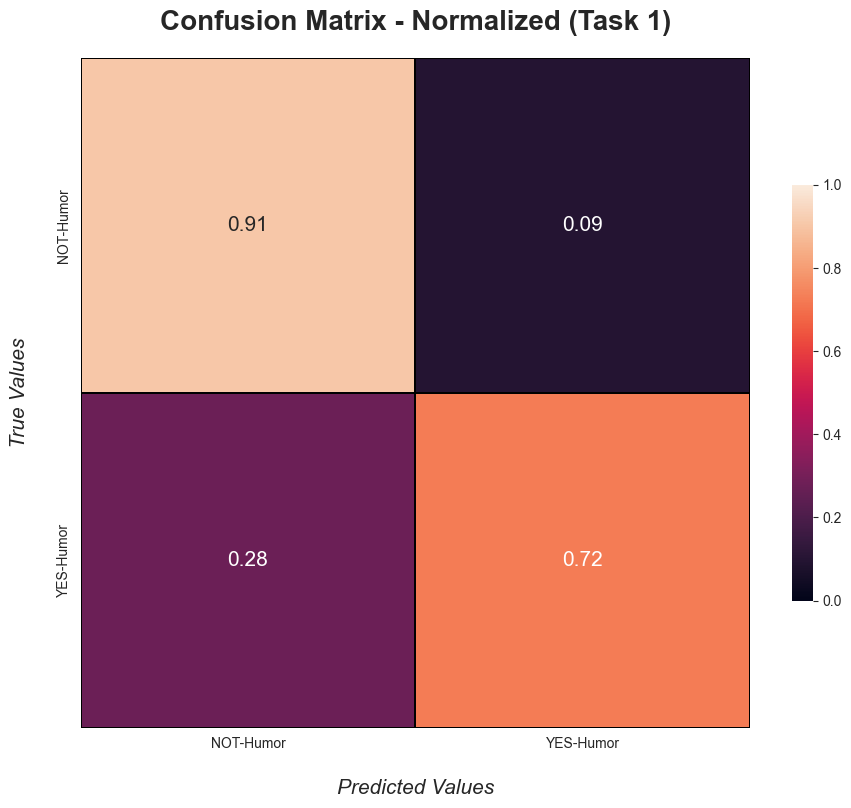

In [12]:
fig_cm = plt.figure(figsize = (10.8, 10.8))
cm = confusion_matrix(test_predictions["label"], test_predictions["predicted_label"], normalize = "true")


sb.heatmap(cm, vmin = 0, vmax = 1, square = True, annot = True, fmt = ".2f", cbar_kws = {"shrink" : 0.5}, xticklabels = LABELS, yticklabels = LABELS, annot_kws = {"size": 15}, linecolor = "black", linewidth = 0.1)
plt.xlabel("Predicted Values", fontsize = 15, labelpad = 20, style = "italic")
plt.ylabel("True Values", fontsize = 15, labelpad = 20, style = "italic")
plt.title("Confusion Matrix - Normalized (Task 1)", fontsize = 20, pad = 20, weight = "bold")


fig_cm.savefig(os.path.join(PATH + "\\!graphs", "CONFUSION-MATRIX-T1.png"))
fig_cm.savefig(os.path.join(PATH + "\\!graphs", "CONFUSION-MATRIX-T1.pdf"))
plt.show()

### ROC Curve

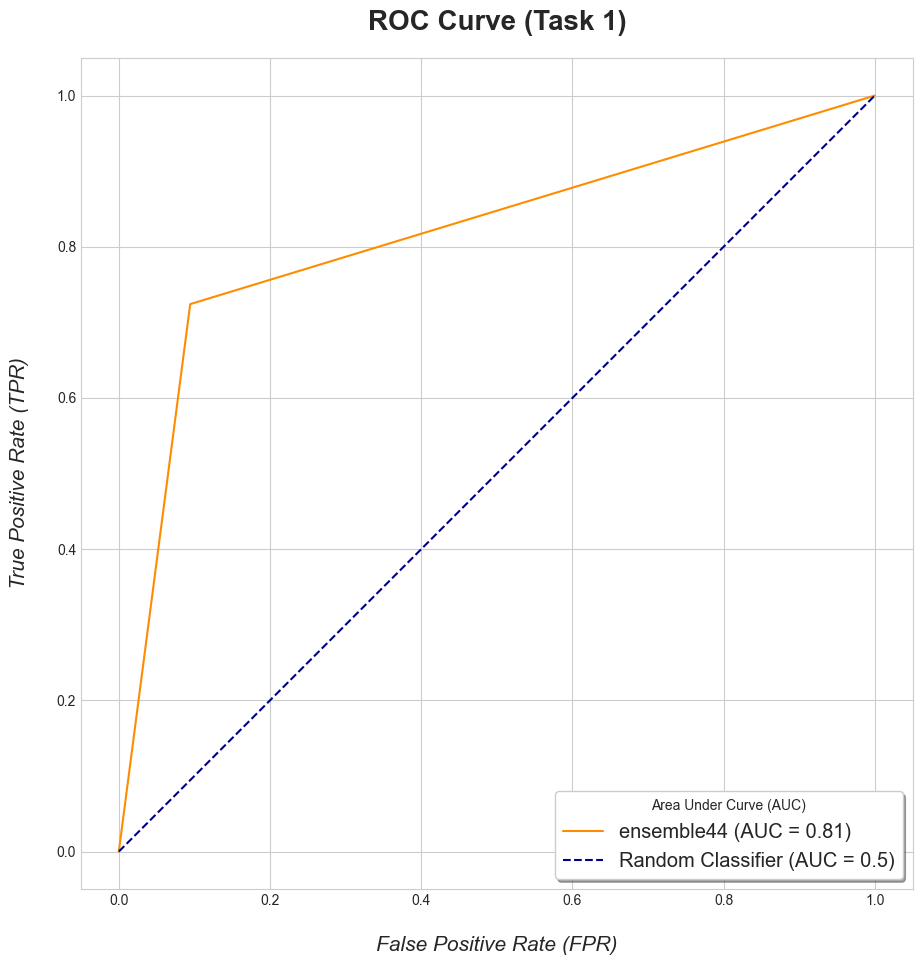

In [13]:
fig_roc = plt.figure(figsize = (10.8, 10.8))
fpr, tpr, _ = roc_curve(test_predictions["label"], test_predictions["predicted_label"])


plt.plot(fpr, tpr, color = "darkorange", label = "{} (AUC = {:0.2f})".format(best_ensemble.get("name"), auc(fpr, tpr)))
plt.plot([0, 1], [0, 1], color = "darkblue", linestyle = "--", label = "Random Classifier (AUC = 0.5)")
plt.axis("square")
plt.xlabel("False Positive Rate (FPR)", fontsize = 15, labelpad = 20, style = "italic")
plt.ylabel("True Positive Rate (TPR)", fontsize = 15, labelpad = 20, style = "italic")
plt.title("ROC Curve (Task 1)", fontsize = 20, pad = 20, weight = "bold")
plt.tick_params(axis = "y", direction = "in")
plt.tick_params(axis = "x", direction = "in")
plt.legend(title = "Area Under Curve (AUC)", loc = "lower right", fontsize = "x-large", shadow = True)


fig_roc.savefig(os.path.join(PATH + "\\!graphs", "ROC-T1.png"))
fig_roc.savefig(os.path.join(PATH + "\\!graphs", "ROC-T1.pdf"))
plt.show()

### All Transformers

In [14]:
data = {}
for i in transformers:
    data[i] = globals()[i]["metrics"]

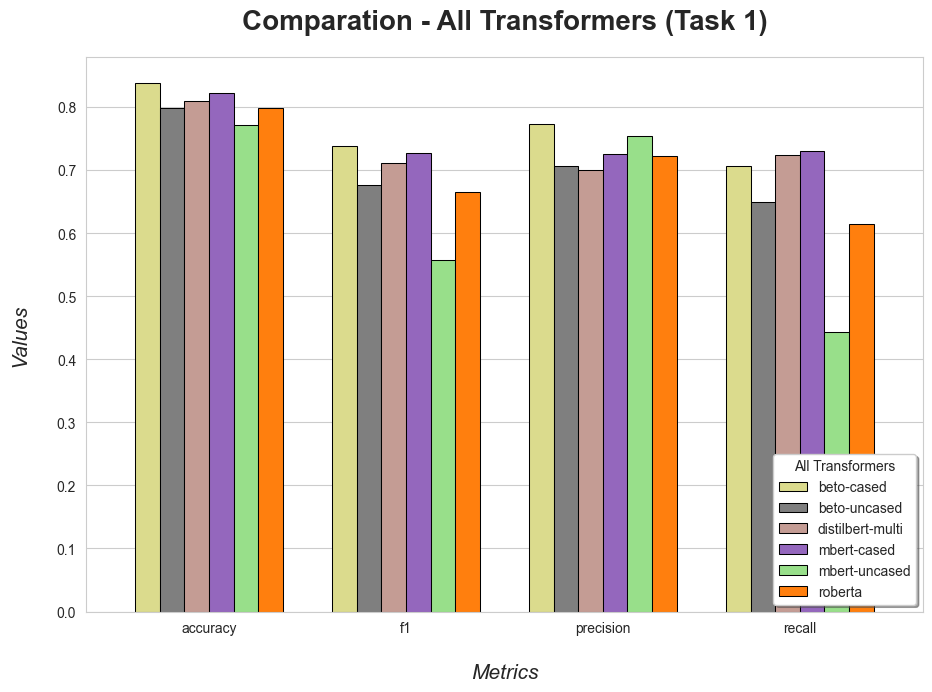

In [15]:
dataframe = pd.DataFrame(data)
fig_mc, ax_mc = plt.subplots(figsize = (10.8, 7.2))


dataframe.plot(kind = "bar", ax = ax_mc, color = sb.color_palette("tab20_r"), width = 0.75, edgecolor = "black", linewidth = 3/4)
ax_mc.xaxis.grid(False)
plt.xlabel("Metrics", fontsize = 15, labelpad = 20, style = "italic")
plt.xticks(rotation = 0)
plt.ylabel("Values", fontsize = 15, labelpad = 20, style = "italic")
plt.title("Comparation - All Transformers (Task 1)", fontsize = 20, pad = 20, weight = "bold")
ax_mc.legend(title = "All Transformers", loc = "lower right", fontsize = "medium", shadow = True)


fig_mc.savefig(os.path.join(PATH + "\\!graphs", "COMPARATION-T1.png"))
fig_mc.savefig(os.path.join(PATH + "\\!graphs", "COMPARATION-T1.pdf"))
plt.show()

### Ensemble Ponderation Votation

In [16]:
f1_summs = 0
for i in best_ensemble["models"]:
    f1_summs += globals()[i]["metrics"]["f1"]

In [17]:
votation_values = []
for i in best_ensemble["models"]:
    votation_values.append(globals()[i]["metrics"]["f1"] / f1_summs)

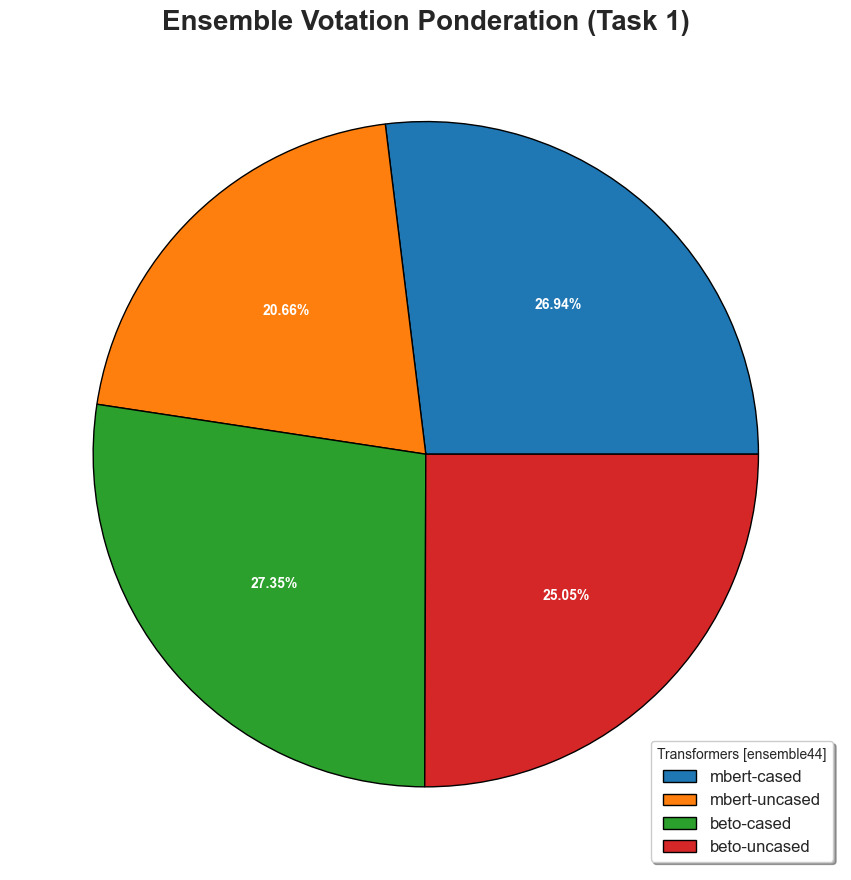

In [18]:
fig_votation, ax_votation= plt.subplots(figsize = (10.8, 10.8))


plt.pie(votation_values, labels = best_ensemble["models"], autopct = '%1.2f%%', textprops =  {"fontsize": 10, "weight": "bold", "color": "white"}, wedgeprops = {"linewidth": 1, "edgecolor":"black"})


plt.title("Ensemble Votation Ponderation (Task 1)", fontsize = 20, weight = "bold")
plt.legend(title = "Transformers [" + best_ensemble["name"] + "]", loc = "lower right", fontsize = "large", shadow = True)
plt.axis("off")
ax_votation.set_frame_on(False)


fig_votation.savefig(os.path.join(PATH + "\\!graphs", "ENSEMBLE-VOTATION-T1.png"))
fig_votation.savefig(os.path.join(PATH + "\\!graphs", "ENSEMBLE-VOTATION-T1.pdf"))
plt.show()